# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
cities_format = []
# Parsing through cities to remake list suitable for api query format
for city in cities:
    
    # replacing spaces in between words with '&'
    if ' ' in city:
        city = city.replace(' ', '&')
        
    # Appending to new list 
    cities_format.append(city)

In [4]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
unit = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities_format):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={unit}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta&arenas
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | estelle
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | ostrovnoy
Processing Record 8 of Set 1 | padang
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | coahuayana
Processing Record 11 of Set 1 | east&london
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | kiunga
Processing Record 14 of Set 1 | cabo&san&lucas
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | corrales
Processing Record 17 of Set 1 | cape&town
Processing Record 18 of Set 1 | shelburne
Processing Record 19 of Set 1 | urengoy
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | carutaper

Processing Record 33 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 34 of Set 4 | porto&novo
Processing Record 35 of Set 4 | burnie
Processing Record 36 of Set 4 | airai
Processing Record 37 of Set 4 | griffith
Processing Record 38 of Set 4 | gwembe
Processing Record 39 of Set 4 | vila&velha
Processing Record 40 of Set 4 | belogradcik
City not found. Skipping...
Processing Record 41 of Set 4 | amderma
City not found. Skipping...
Processing Record 42 of Set 4 | san&roque
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | pangnirtung
Processing Record 45 of Set 4 | laguna
Processing Record 46 of Set 4 | pangody
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | leningradskiy
Processing Record 49 of Set 4 | tosu
Processing Record 0 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 1 of Set 5 | sur
Processing Record 2 of Set 5 | davila
Processing Record 3 of Set 5 | te&anau
City not found. Skipping...
Processing Record

Processing Record 21 of Set 8 | kaeo
Processing Record 22 of Set 8 | buchlovice
Processing Record 23 of Set 8 | talnakh
Processing Record 24 of Set 8 | coquimbo
Processing Record 25 of Set 8 | shache
Processing Record 26 of Set 8 | mlowo
Processing Record 27 of Set 8 | nacala
Processing Record 28 of Set 8 | ulladulla
Processing Record 29 of Set 8 | kragujevac
Processing Record 30 of Set 8 | orlik
Processing Record 31 of Set 8 | ostashkov
Processing Record 32 of Set 8 | catarman
Processing Record 33 of Set 8 | bara
Processing Record 34 of Set 8 | sola
Processing Record 35 of Set 8 | nouadhibou
Processing Record 36 of Set 8 | longlac
City not found. Skipping...
Processing Record 37 of Set 8 | okandja
City not found. Skipping...
Processing Record 38 of Set 8 | russell
Processing Record 39 of Set 8 | beruni
City not found. Skipping...
Processing Record 40 of Set 8 | atasu
Processing Record 41 of Set 8 | rio&gallegos
Processing Record 42 of Set 8 | balakhta
Processing Record 43 of Set 8 | s

Processing Record 5 of Set 12 | torrelavega
Processing Record 6 of Set 12 | jiazi
Processing Record 7 of Set 12 | wanning
Processing Record 8 of Set 12 | matagami
Processing Record 9 of Set 12 | coihaique
Processing Record 10 of Set 12 | pagudpud
Processing Record 11 of Set 12 | churhat
Processing Record 12 of Set 12 | soe
Processing Record 13 of Set 12 | poshekhonye
Processing Record 14 of Set 12 | labuhan
Processing Record 15 of Set 12 | menongue
Processing Record 16 of Set 12 | xinqing
Processing Record 17 of Set 12 | tarudant
City not found. Skipping...
Processing Record 18 of Set 12 | arman
Processing Record 19 of Set 12 | bambui
Processing Record 20 of Set 12 | locri
Processing Record 21 of Set 12 | montalvo
Processing Record 22 of Set 12 | udachnyy
Processing Record 23 of Set 12 | chichi
Processing Record 24 of Set 12 | rungata
City not found. Skipping...
Processing Record 25 of Set 12 | guerrero&negro
Processing Record 26 of Set 12 | sundargarh
Processing Record 27 of Set 12 | 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [6]:
# Sort dataframe and correct formatting
city_data_df.sort_values(['City'], ascending=True, inplace=True)
city_data_df.reset_index(drop=True, inplace=True)
city_data_df['City'] = city_data_df['City'].str.replace('&', ' ')

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,abalak,58.1286,68.5944,-18.32,99,100,1.53,RU,1675727123
1,abha,18.2164,42.5053,12.14,82,0,6.17,SA,1675727201
2,abu dhabi,24.6000,72.7000,10.97,57,0,1.54,IN,1675727092
3,abu kamal,24.6000,72.7000,10.97,57,0,1.54,IN,1675727092
4,abu samrah,24.6000,72.7000,10.97,57,0,1.54,IN,1675727185


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,abalak,58.1286,68.5944,-18.32,99,100,1.53,RU,1675727123
1,abha,18.2164,42.5053,12.14,82,0,6.17,SA,1675727201
2,abu dhabi,24.6000,72.7000,10.97,57,0,1.54,IN,1675727092
3,abu kamal,24.6000,72.7000,10.97,57,0,1.54,IN,1675727092
4,abu samrah,24.6000,72.7000,10.97,57,0,1.54,IN,1675727185


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

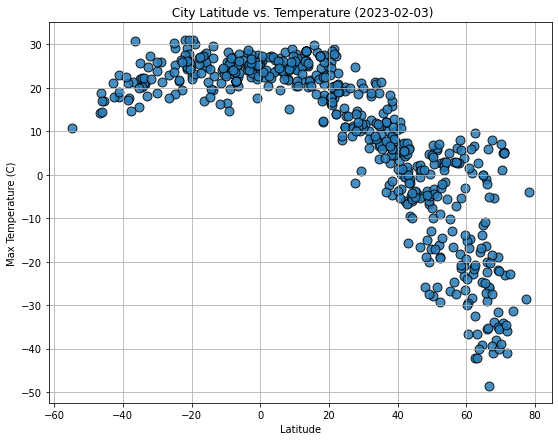

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

fig1 = city_data_df.plot(x='Lat', y='Max Temp',
                         kind='scatter', 
                         xlabel='Latitude',
                         ylabel='Max Temperature (C)',
                         title=' City Latitude vs. Temperature (2023-02-03)',
                         figsize = (9,7),
                         s=80,
                         c='#287cb7',
                         edgecolor = 'black',
                         alpha=0.85,
                         grid=True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

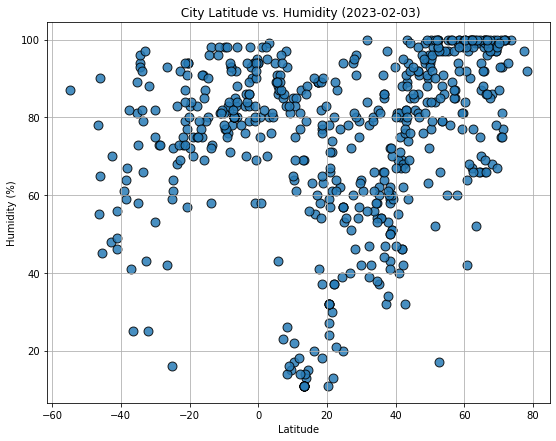

In [10]:
# Build the scatter plots for latitude vs. humidity
fig2 = city_data_df.plot(x='Lat', y='Humidity',
                         kind='scatter', 
                         xlabel='Latitude',
                         ylabel='Humidity (%)',
                         title=' City Latitude vs. Humidity (2023-02-03)',
                         figsize = (9,7),
                         s=80,
                         c='#287cb7',
                         edgecolor = 'black',
                         alpha=0.85,
                         grid=True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

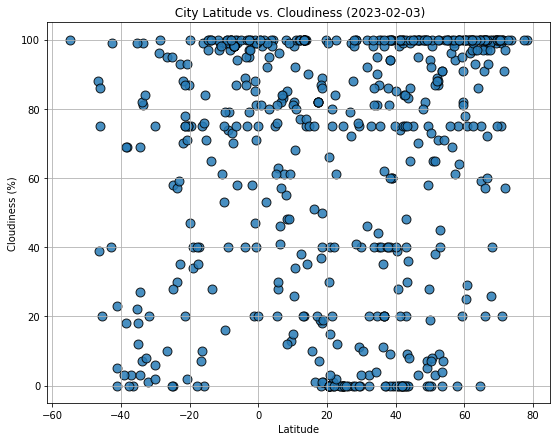

In [11]:
# Build the scatter plots for latitude vs. cloudiness
fig3 = city_data_df.plot(x='Lat', y='Cloudiness',
                         kind='scatter', 
                         xlabel='Latitude',
                         ylabel='Cloudiness (%)',
                         title=' City Latitude vs. Cloudiness (2023-02-03)',
                         figsize = (9,7),
                         s=80,
                         c='#287cb7',
                         edgecolor = 'black',
                         alpha=0.85,
                         grid=True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

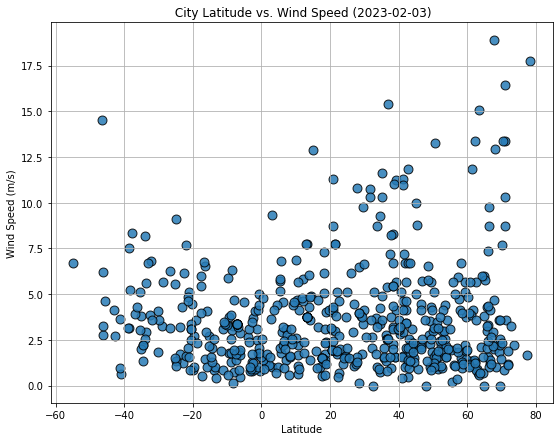

In [12]:
# Build the scatter plots for latitude vs. wind speed
fig4 = city_data_df.plot(x='Lat', y='Wind Speed',
                         kind='scatter', 
                         xlabel='Latitude',
                         ylabel='Wind Speed (m/s)',
                         title=' City Latitude vs. Wind Speed (2023-02-03)',
                         figsize = (9,7),
                         s=80,
                         c='#287cb7',
                         edgecolor = 'black',
                         alpha=0.85,
                         grid=True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def lin_reg(x,y):
    
    # Linear regression setup
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = (slope*x) + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Incoporate graph properties
    plt.figure(figsize=(9,7))
    plt.xlabel('Latitude')
    plt.ylabel(y.name)
    
    # Plotting scatter and linear regression
    plt.scatter(x, y, c='#287cb7', s=90, edgecolor='black', alpha=0.75)
    plt.plot(x, regress_values, 'r-')
    
    # Annotate linear regression line
    plt.annotate(line_eq, xy=(min(x), min(regress_values)+5), c='r', fontsize=20)
    
    # Print r value
    print(f"The r-value is: {rvalue}")
    
    return plt.show()
    

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0].sort_values(['City'], ascending=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,abalak,58.1286,68.5944,-18.32,99,100,1.53,RU,1675727123
1,abha,18.2164,42.5053,12.14,82,0,6.17,SA,1675727201
2,abu dhabi,24.6000,72.7000,10.97,57,0,1.54,IN,1675727092
3,abu kamal,24.6000,72.7000,10.97,57,0,1.54,IN,1675727092
4,abu samrah,24.6000,72.7000,10.97,57,0,1.54,IN,1675727185


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0].sort_values(['City'], ascending=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,acari,-15.4311,-74.6158,24.71,87,84,2.72,PE,1675727193
7,ahipara,-35.1667,173.1667,22.10,58,18,3.78,NZ,1675727252
9,airai,-8.9266,125.4092,19.58,76,74,1.27,TL,1675727127
17,alofi,-19.0595,-169.9187,29.94,70,40,3.60,NU,1675727275
19,alyangula,-13.8483,136.4192,29.62,58,65,0.83,AU,1675727222


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8552905740462409


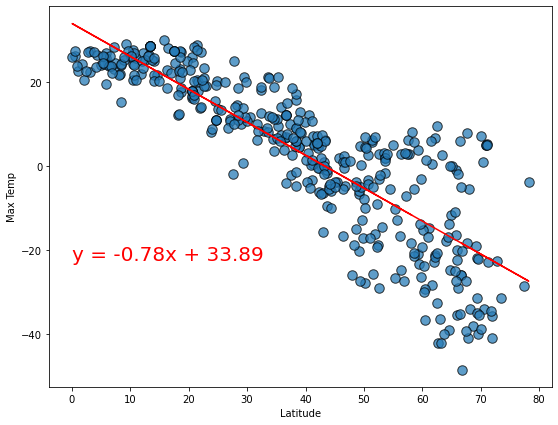

In [54]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

The r-value is: 0.4129749250655596


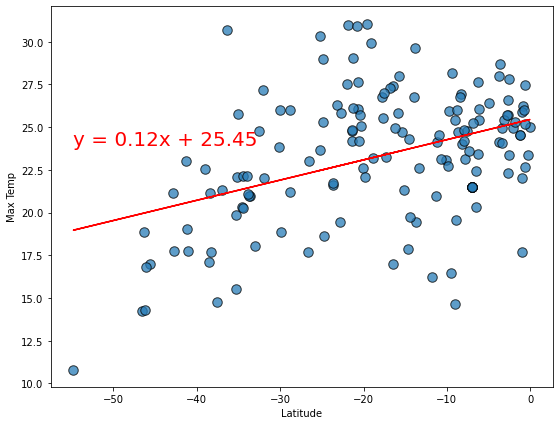

In [55]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** The linear regression model is attempting fit a line to the data points in the scatter plot, based on the relationship between the temperature and latitude in the northern and southern hemisphere. The results from the northern hemisphere suggests a strong negative relationship between latitude and maximum temperature. The results from the southern hemisphere suggests a moderate positive relationship between the two variables. Both results make logical sense as temperatures generally decrease as you move away from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.43394107638670476


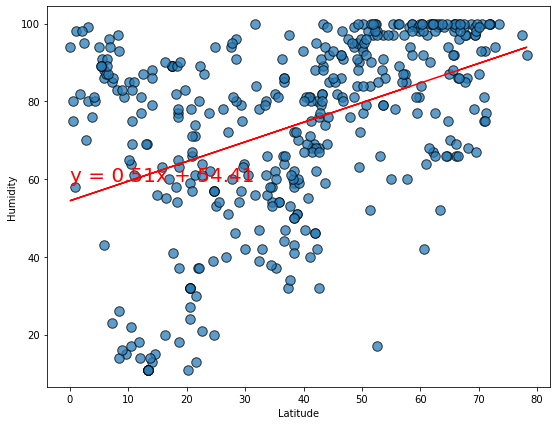

In [56]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

The r-value is: 0.45422068978423946


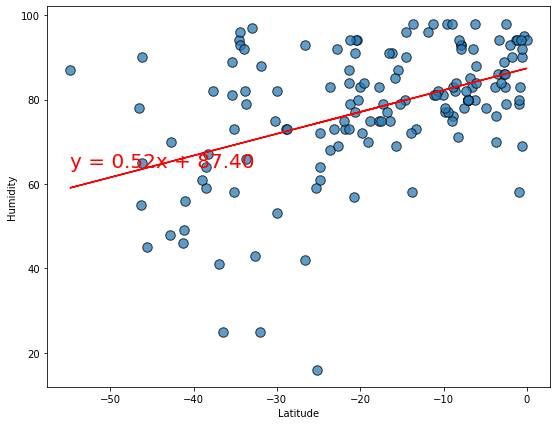

In [57]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** The linear regression model is attempting fit a line to the data points in the scatter plot, based on the relationship between the humidity and latitude in the northern and southern hemisphere. The results from both the northern and sourthern hemisphere suggests a moderate positive relationship between latitude and maximum temperature. as latitude increases, humidity increases. A quick google search suggests that humidity is not directly proportional to distance from the equator, and are dependent on a variety of factors, most prominently how close to the sea a city is. Given the moderate strength of the correlation coefficient, this linear regression model may not be a strong predictor of humidity based on latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23935039191902238


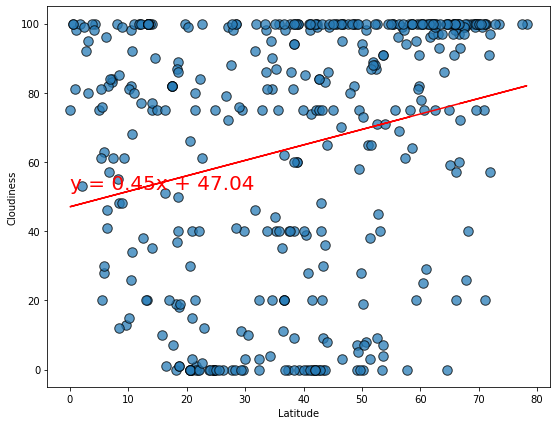

In [58]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

The r-value is: 0.4378041047127225


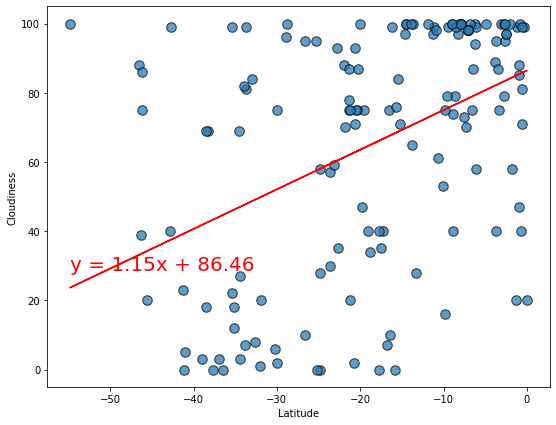

In [59]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** The linear regression model is attempting fit a line to the data points in the scatter plot, based on the relationship between the cloudiness and latitude in the northern and southern hemisphere. The results from the northern indicates a weak, positive linear relationship between latitude and cloudiness. This means that as latitude increases, cloudiness tends to increase slightly, but the relationship is not very strong. Based on a google search, there is a general trend of decreasing cloudiness as you move away from the equator and towards the poles. This relationship can be described by the moderate positive correlation in the southern hemisphere result. With both graphs, as there are many outliers, this linear regression model may not be a good predictor of cloudiness based on latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08000633075119518


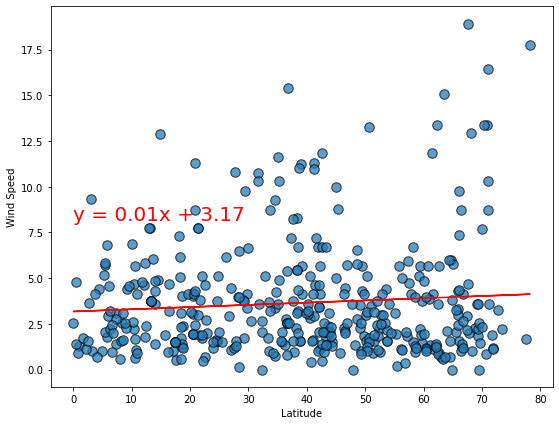

In [60]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

The r-value is: -0.39125241327838717


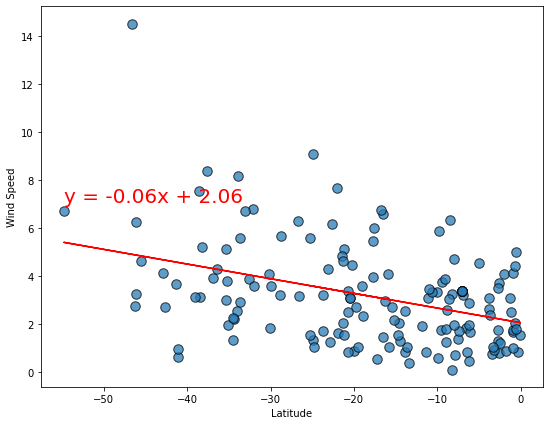

In [61]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** The linear regression model is attempting fit a line to the data points in the scatter plot, based on the relationship between wind speed and latitude in the northern and southern hemisphere. The results from both analysis suggest very weak correlation between the two variables as calculated by the almost negligible r-value. combined with the fact that many outliers exist on both plots, this linear regression should not be used to forecast wind speed based on latitude.